# **RFM Analysis for Customer Segmentation**  
---
> **Context**

* Project Summary
* Situation Introduction
  - Process 1
  - Process 2
  - Process 3

## **Project Summary**
---

> **Project Title**

```
▶ RFM Analysis for Customer Segmentation
```  

> **Project Type**
```
▶ Data EDA & Segmentaion
```



## **Situation Introduction**
---
> **Scenario** 

```
Company A operates an open-market platform.  
After launch, the number of users grew rapidly, but the service has now entered a stagnation phase.  
To understand the current level of service usage and how it has changed since launch, the company plans to conduct various analyses.

```  

> **Problem Definition**

```
▶ Post-launch stagnation leading to a decline in operating profit and active user count

```  

> **Expected Outcome**

```
▶ Identify the causes of stagnation, establish and execute countermeasures to increase operating profit and user base

```

> **Proposed Solution**

```
▶ Utilize purchase data to assess service usage status (metric planning)

```

> **Performance Metric**  

```
▶ Use defined metrics to assess current service usage

```

> **Operations**  

```
▶ Publish data insight reports based on key metrics
▶ Develop and monitor a BI dashboard using these metrics to track performance and detect issues

```

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import matplotlib.pyplot as plt

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    IMAGES_PATH = os.path.join("images")
    os.makedirs(IMAGES_PATH, exist_ok=True)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

df=pd.read_csv('rfm.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **Process 1**  
- **Explore Service Usage Trend**  
---

### Data Preprocessing  
---
* Review the basic characteristics of the collected dataset: 

  (1) Check data shape

  (2) Verify data type

  (3) Identify missing values

  (4) Detect outliers

In [4]:
print('df', df.shape)

df (541909, 8)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df.dropna(subset=['CustomerID'], how='all', inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

<Axes: xlabel='Quantity', ylabel='Density'>

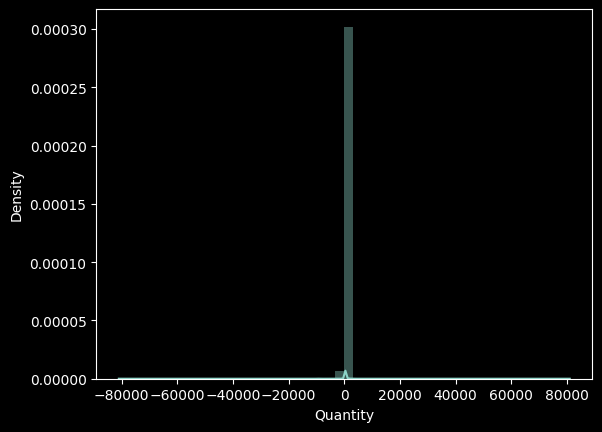

In [9]:
# check negative data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.distplot(df['Quantity'])

In [10]:
df = df[df['UnitPrice']>0]
df.describe()

,Quantity,UnitPrice,CustomerID
count,406789.000000,406789.000000,406789.000000
mean,12.028359,3.460811,15287.795830
std,247.927842,69.318561,1713.573064
min,-80995.000000,0.001000,12346.000000
25%,2.000000,1.250000,13954.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
df = df[df['Quantity']>0]
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [12]:
df.shape

(397884, 8)

In [13]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [14]:
df['CustomerID'].nunique(), df['Quantity'].sum(), df['Country'].nunique()

(4338, 5167812, 37)

In [15]:
# avg order # per person
df.groupby('CustomerID')['InvoiceNo'].count().mean()

91.72060857538035

## **Process 2**  
- **Data Extract & Feature**  
---

### Recency
---

In [16]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [17]:
# split to find date
df['InvoiceDate'].str.split(' ').str[0]

0         12/1/2010
1         12/1/2010
2         12/1/2010
3         12/1/2010
4         12/1/2010
            ...    
541904    12/9/2011
541905    12/9/2011
541906    12/9/2011
541907    12/9/2011
541908    12/9/2011
Name: InvoiceDate, Length: 397884, dtype: object

In [18]:
# Datatime index
import pandas as pd
df['Date'] = pd.to_datetime(df['InvoiceDate'].str.split(' ').str[0])
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01


In [19]:
df['Date'].min(), df['Date'].max()

(Timestamp('2010-12-01 00:00:00'), Timestamp('2011-12-09 00:00:00'))

In [20]:
# final purchase date per customer ID 
recency_df = df.groupby('CustomerID',as_index=False)['Date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [21]:
# to count how many days passed since final purchase
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x : (df['Date'].max() - x).days)
recency_df.drop(columns=['LastPurchaseDate'],inplace=True)

In [22]:
recency_df.head(5)

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


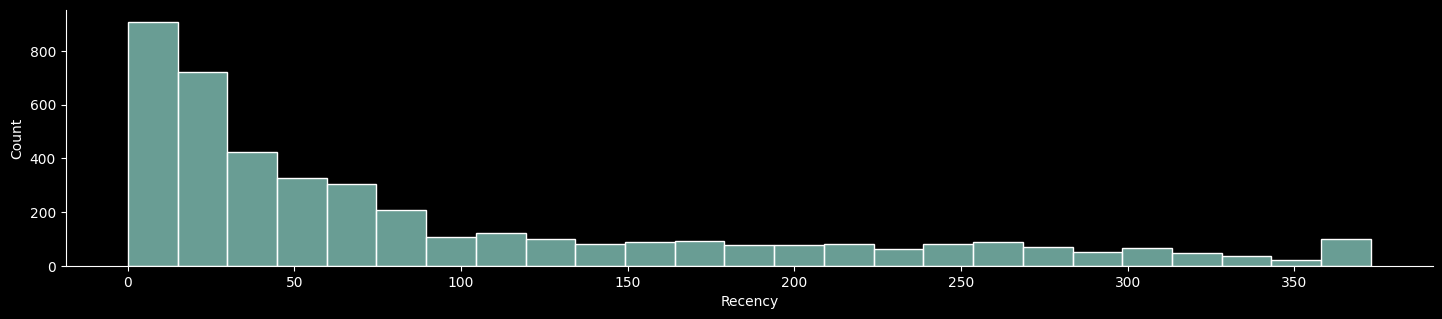

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.displot(data = recency_df, x="Recency");
plt.gcf().set_size_inches(16.5, 3)

### Frequency
---

In [24]:
# count unique invoice per customer ID to see frequency
frequency_df = df.copy()
frequency_df.drop_duplicates(subset=['CustomerID','InvoiceNo'], keep="first", inplace=True)
frequency_df = frequency_df.groupby('CustomerID', as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


### Monetary
---

In [25]:
df['Total_cost'] = df['UnitPrice'] * df['Quantity']
monetary_df=df.groupby('CustomerID',as_index=False)['Total_cost'].sum()
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [26]:
# final rfm merge
rf = recency_df.merge(frequency_df,how='left',on='CustomerID')
rfm = rf.merge(monetary_df,how='left',on='CustomerID')

rfm.head(5)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


## **Process 3**  
- **Service Usage Measure with RFM**  
---



### Scaling Data
---

In [27]:
# Min max scale
from sklearn.preprocessing import minmax_scale

# lower recency - higher score
rfm['Recency'] = minmax_scale(rfm['Recency'], axis=0, copy=True)
rfm['Recency'] = 1-rfm['Recency']

rfm['Frequency'] = minmax_scale(rfm['Frequency'], axis=0, copy=True)

rfm['Monetary'] = minmax_scale(rfm['Monetary'], axis=0, copy=True)

rfm['Score']=rfm['Recency']+rfm['Frequency']+rfm['Monetary']
rfm

,CustomerID,Recency,Frequency,Monetary,Score
0,12346.0,0.128686,0.000000,0.275443,0.404130
1,12347.0,0.994638,0.028846,0.015368,1.038853
2,12348.0,0.798928,0.014423,0.006401,0.819751
3,12349.0,0.951743,0.000000,0.006259,0.958002
4,12350.0,0.168901,0.000000,0.001180,0.170081
...,...,...,...,...,...
4333,18280.0,0.257373,0.000000,0.000631,0.258004
4334,18281.0,0.517426,0.000000,0.000275,0.517701
4335,18282.0,0.981233,0.004808,0.000622,0.986663
4336,18283.0,0.991957,0.072115,0.007463,1.071535


In [28]:
#scale by 100
rfm['Score']=minmax_scale(rfm['Score'], axis=0, copy=True)*100
rfm['Score']=round(rfm['Score'],0)

In [29]:
rfm.head(5)

,CustomerID,Recency,Frequency,Monetary,Score
0,12346.0,0.128686,0.000000,0.275443,16.0
1,12347.0,0.994638,0.028846,0.015368,42.0
2,12348.0,0.798928,0.014423,0.006401,33.0
3,12349.0,0.951743,0.000000,0.006259,39.0
4,12350.0,0.168901,0.000000,0.001180,7.0


### Sectioning Grade
---

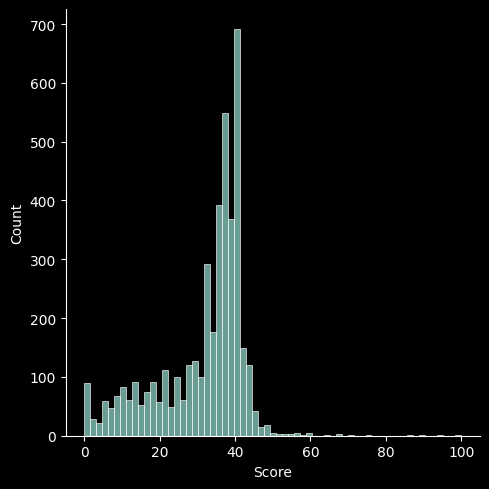

In [30]:
sns.displot(rfm['Score']);

In [31]:
rfm.head(5)

,CustomerID,Recency,Frequency,Monetary,Score
0,12346.0,0.128686,0.000000,0.275443,16.0
1,12347.0,0.994638,0.028846,0.015368,42.0
2,12348.0,0.798928,0.014423,0.006401,33.0
3,12349.0,0.951743,0.000000,0.006259,39.0
4,12350.0,0.168901,0.000000,0.001180,7.0


In [32]:
# >= 60 Very strong
# 40~60  Strong
# 20~40 Normal
# 10~20 Weak
# 0~10 Very Weak

rfm['Grade'] = rfm['Score'].apply(lambda x : '01.Very Strong' if x>=60 else
                                  ('02.Strong' if x>=40 else
                                   ('03.Normal' if x>=20 else
                                    ('04.Weak' if x>=10 else '05.Very Weak'))))
rfm.head(5)

,CustomerID,Recency,Frequency,Monetary,Score,Grade
0,12346.0,0.128686,0.000000,0.275443,16.0,04.Weak
1,12347.0,0.994638,0.028846,0.015368,42.0,02.Strong
2,12348.0,0.798928,0.014423,0.006401,33.0,03.Normal
3,12349.0,0.951743,0.000000,0.006259,39.0,03.Normal
4,12350.0,0.168901,0.000000,0.001180,7.0,05.Very Weak


In [33]:
#left join grade 
df = pd.merge(df, rfm, how='left', on='CustomerID')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total_cost,Recency,Frequency,Monetary,Score,Grade
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,15.30,0.002681,0.158654,0.019227,7.0,05.Very Weak
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0.002681,0.158654,0.019227,7.0,05.Very Weak
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,22.00,0.002681,0.158654,0.019227,7.0,05.Very Weak
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0.002681,0.158654,0.019227,7.0,05.Very Weak
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0.002681,0.158654,0.019227,7.0,05.Very Weak


In [34]:
# new column of yy-mm to do monthly analysis
df['Date_1'] = df["Date"].dt.strftime("%Y-%m")
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total_cost,Recency,Frequency,Monetary,Score,Grade,Date_1
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,15.30,0.002681,0.158654,0.019227,7.0,05.Very Weak,2010-12
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0.002681,0.158654,0.019227,7.0,05.Very Weak,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,22.00,0.002681,0.158654,0.019227,7.0,05.Very Weak,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0.002681,0.158654,0.019227,7.0,05.Very Weak,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0.002681,0.158654,0.019227,7.0,05.Very Weak,2010-12


### Index design

#### Monthly Customers Board
---

In [35]:
df_cus = df.groupby('Date_1',as_index=False)['CustomerID'].nunique()
df_cus.tail(5)

,Date_1,CustomerID
8,2011-08,935
9,2011-09,1266
10,2011-10,1364
11,2011-11,1664
12,2011-12,615


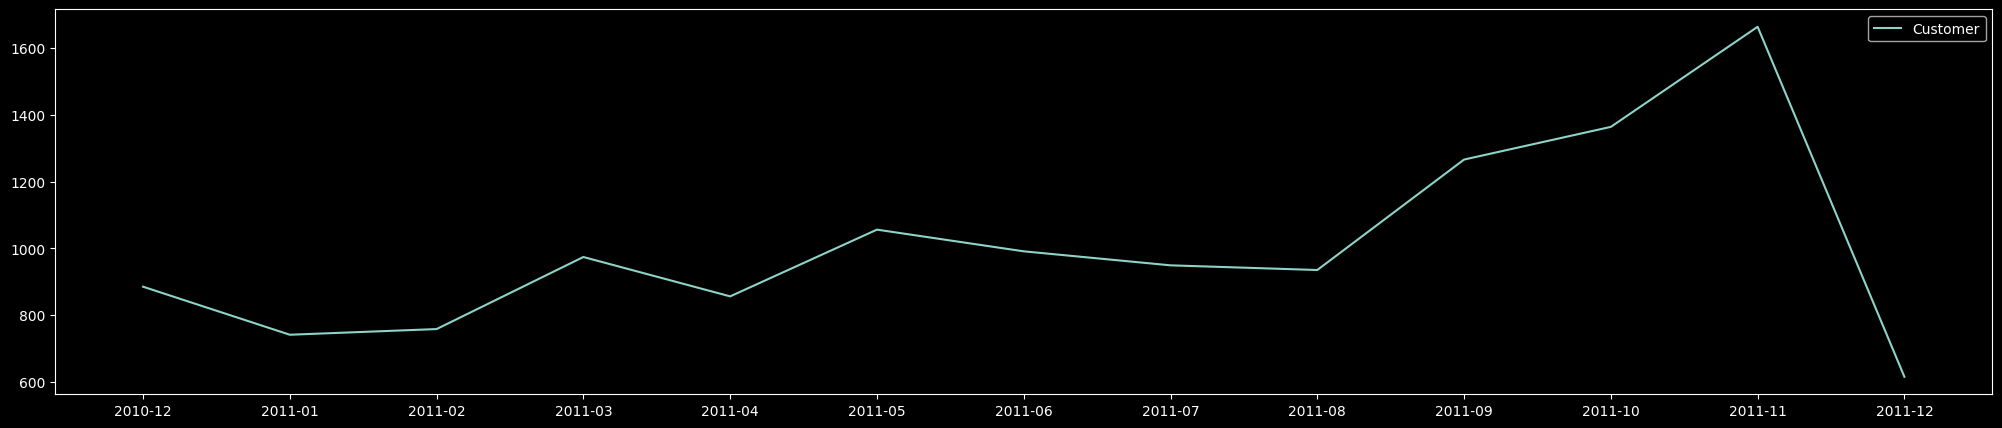

In [36]:
plt.plot(df_cus['Date_1'], df_cus['CustomerID'], label='Customer');
plt.legend();
plt.gcf().set_size_inches(25, 5)

#### Monthly Usage Rate
---

In [37]:
df_cnt = df.groupby('Date_1',as_index=False)['InvoiceNo'].nunique()
df_cnt.head(5)

,Date_1,InvoiceNo
0,2010-12,1400
1,2011-01,987
2,2011-02,997
3,2011-03,1321
4,2011-04,1149


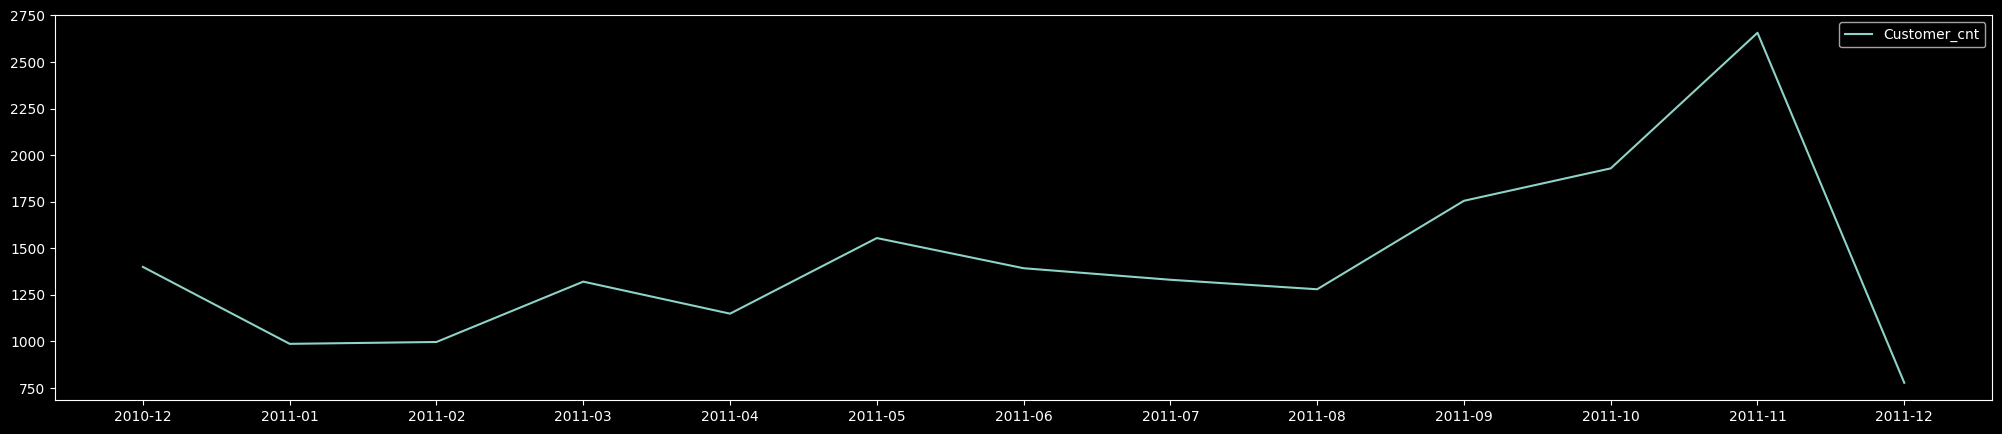

In [38]:
plt.plot(df_cnt['Date_1'], df_cnt['InvoiceNo'], label='Customer_cnt');
plt.legend();
plt.gcf().set_size_inches(25, 5)

#### Monthly Country Board
---

In [39]:
df['Country'].nunique()

37

In [40]:
df_country = df.groupby('Date_1',as_index=False)['Country'].nunique()
df_country.head(5)

,Date_1,Country
0,2010-12,22
1,2011-01,20
2,2011-02,24
3,2011-03,22
4,2011-04,24


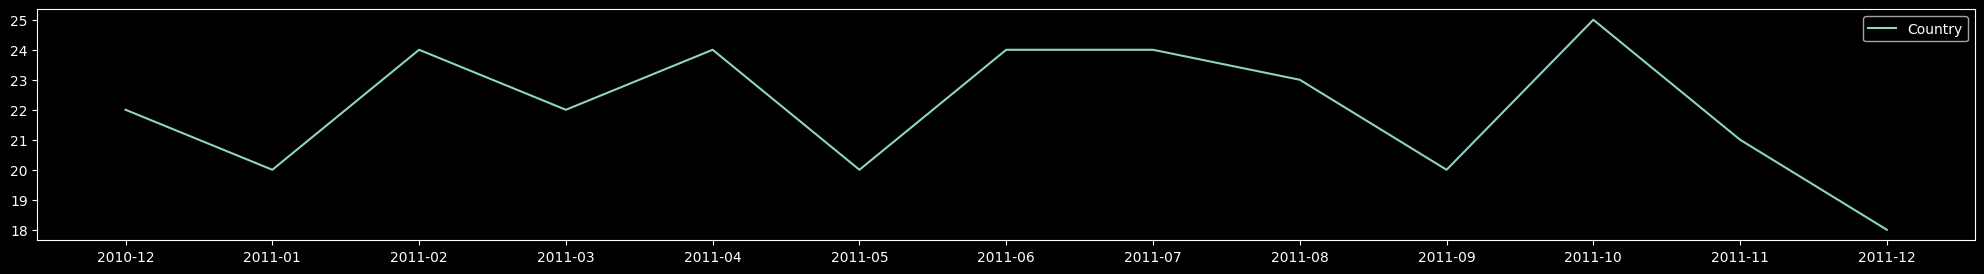

In [41]:
plt.plot(df_country['Date_1'], df_country['Country'], label='Country');
plt.legend();
plt.gcf().set_size_inches(25, 3)

In [42]:
# most active country
pd.DataFrame(df.groupby(['Country'])['InvoiceNo'].nunique().sort_values(ascending=False)).head(10)

,InvoiceNo
Country,
United Kingdom,16646
Germany,457
France,389
EIRE,260
Belgium,98
Netherlands,94
Spain,90
Australia,57
Portugal,57


#### Monthly - Grade
---

In [43]:
df_grade = df.groupby(['Date_1', 'Grade'],as_index=False)['CustomerID'].nunique()
df_grade.head(5)

,Date_1,Grade,CustomerID
0,2010-12,01.Very Strong,11
1,2010-12,02.Strong,397
2,2010-12,03.Normal,291
3,2010-12,04.Weak,42
4,2010-12,05.Very Weak,144


In [44]:
df_pivot = pd.pivot_table(df_grade,
                      index = 'Date_1',
                      columns = 'Grade', 
                      values = 'CustomerID')

df_pivot.fillna(0, inplace=True)
df_pivot['total'] = df_pivot['01.Very Strong'] + df_pivot['02.Strong'] + df_pivot['03.Normal'] + df_pivot['04.Weak'] + df_pivot['05.Very Weak']


df_pivot.iloc[:,0] = (df_pivot.iloc[:,0] / df_pivot['total'])
df_pivot.iloc[:,1] = (df_pivot.iloc[:,1] / df_pivot['total'])
df_pivot.iloc[:,2] = (df_pivot.iloc[:,2] / df_pivot['total'])
df_pivot.iloc[:,3] = (df_pivot.iloc[:,3] / df_pivot['total'])
df_pivot.iloc[:,4] = (df_pivot.iloc[:,4] / df_pivot['total'])

df_pivot.drop(['total'], axis=1, inplace=True)
df_pivot

Grade,01.Very Strong,02.Strong,03.Normal,04.Weak,05.Very Weak
Date_1,,,,,
2010-12,0.012429,0.448588,0.328814,0.047458,0.162712
2011-01,0.014845,0.450742,0.349528,0.045884,0.139001
2011-02,0.014512,0.419525,0.377309,0.056728,0.131926
2011-03,0.012320,0.401437,0.388090,0.198152,0.000000
2011-04,0.014019,0.420561,0.394860,0.170561,0.000000
2011-05,0.012311,0.425189,0.428977,0.133523,0.000000
2011-06,0.012109,0.427851,0.560040,0.000000,0.000000
2011-07,0.012645,0.443625,0.543730,0.000000,0.000000
2011-08,0.012834,0.453476,0.533690,0.000000,0.000000


Saving figure rfm_grade_mix


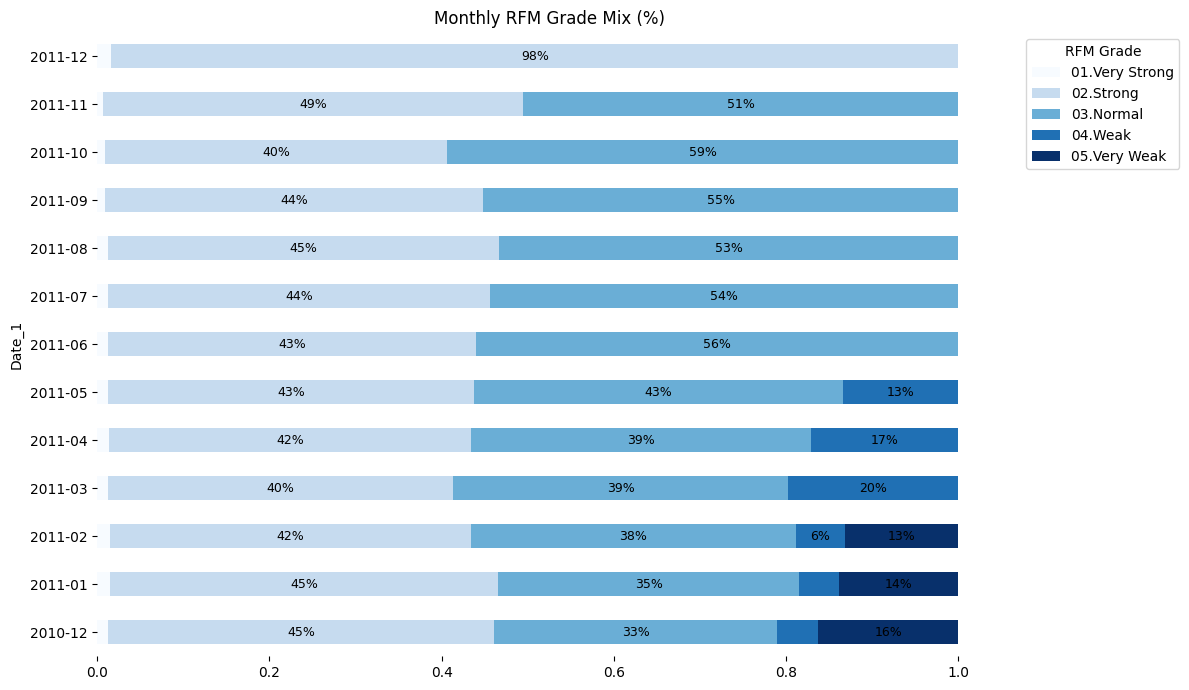

In [48]:
import os
import warnings
warnings.filterwarnings('ignore')
ax = df_pivot.plot(kind='barh', stacked=True, rot=0, title='Monthly RFM Grade Mix (%)', figsize=(12, 7), colormap='Blues')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width >= 0.05:
        ax.text(left + width/2, bottom + height/2, f'{width*100:.0f}%', ha='center', va='center', color='black', fontsize=9)

ax.legend(title='RFM Grade', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.box(False)

save_fig('rfm_grade_mix')